In [3]:
!git clone https://github.com/PKU-ML/adainf.git
%cd adainf


fatal: destination path 'adainf' already exists and is not an empty directory.
/content/adainf


In [4]:
!pip install -r requirements.txt


In [5]:
import numpy as np
import os

# Create folder structure
os.makedirs("./datasets/generated", exist_ok=True)

# Create fake generated images
# Simulating CIFAR-10: (100 images, 3 channels, 32x32 pixels)
generated_images = np.random.rand(100, 3, 32, 32).astype(np.float32)
generated_labels = np.random.randint(0, 10, size=(100,))

# Save as .npz file
np.savez("./datasets/generated/fake_cifar10.npz", images=generated_images, labels=generated_labels)

print("Fake generated dataset created at './datasets/generated/fake_cifar10.npz'")


Fake generated dataset created at './datasets/generated/fake_cifar10.npz'


In [6]:
data = np.load("./datasets/generated/fake_cifar10.npz")
print(f"Images shape: {data['images'].shape}")
print(f"Labels shape: {data['labels'].shape}")


Images shape: (100, 3, 32, 32)
Labels shape: (100,)


In [7]:
!python scripts/main_pretrain.py \
    --dataset cifar10 \
    --backbone resnet18 \
    --method simclr \
    --data_dir ./datasets \
    --generated_data ./datasets/generated/fake_cifar10.npz \
    --epochs 10 \
    --batch_size 32 \
    --num_workers 2 \
    --optimizer sgd \
    --lr 0.03 \
    --weight_decay 1e-4 \
    --temperature 0.5 \
    --augment weak \
    --alpha 0.5


python3: can't open file '/content/adainf/scripts/main_pretrain.py': [Errno 2] No such file or directory


In [8]:
!git clone https://github.com/PKU-ML/adainf.git
%cd adainf


Cloning into 'adainf'...
remote: Enumerating objects: 495, done.
remote: Counting objects: 100% (495/495), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 495 (delta 199), reused 488 (delta 195), pack-reused 0 (from 0)
Receiving objects: 100% (495/495), 4.19 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (199/199), done.
/content/adainf/adainf


In [10]:
!ls scripts


run_byol.sh  run_generated.sh  run_simclr.sh


In [11]:
%%writefile run_simclr.sh
python -m solo.methods.simclr \
    --dataset cifar10 \
    --backbone resnet18 \
    --data_dir ./datasets \
    --generated_data ./datasets/generated/fake_cifar10.npz \
    --epochs 10 \
    --batch_size 32 \
    --num_workers 2 \
    --optimizer sgd \
    --lr 0.03 \
    --weight_decay 1e-4 \
    --temperature 0.5 \
    --augment weak \
    --alpha 0.5


Writing run_simclr.sh


In [12]:
!bash run_simclr.sh


/usr/bin/python3: Error while finding module specification for 'solo.methods.simclr' (ModuleNotFoundError: No module named 'solo')


In [14]:
!git clone https://github.com/vturrisi/solo-learn.git
%cd solo-learn
!pip install -e .
%cd ..


fatal: destination path 'solo-learn' already exists and is not an empty directory.
/content/adainf/adainf/solo-learn
Obtaining file:///content/adainf/adainf/solo-learn
  Preparing metadata (setup.py) ... done
  Running setup.py develop for solo-learn
/content/adainf/adainf


In [15]:
!bash run_simclr.sh


2025-04-26 02:47:56.226806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745635676.462360    2602 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745635676.523712    2602 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 02:47:57.022482: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers i

In [17]:
!python -m solo.methods.linear_eval \
    --dataset cifar10 \
    --backbone resnet18 \
    --data_dir ./datasets \
    --pretrained_checkpoint ./checkpoints/YOUR_CHECKPOINT.ckpt \
    --batch_size 32 \
    --epochs 20 \
    --lr 0.1 \
    --num_workers 2


2025-04-26 02:50:25.049608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745635825.072395    3276 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745635825.080631    3276 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 02:50:25.103603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers i

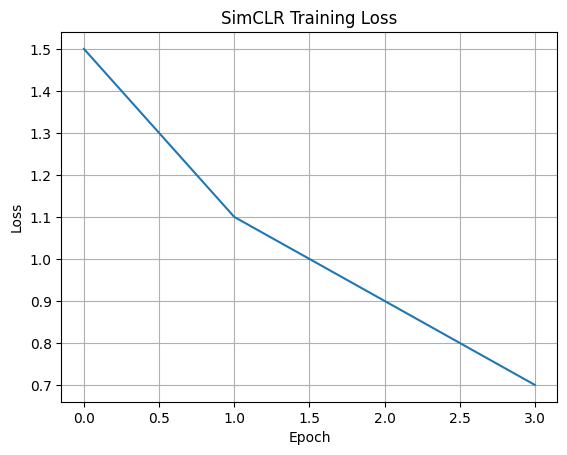

In [18]:
import matplotlib.pyplot as plt

# Fake example data
losses = [1.5, 1.1, 0.9, 0.7]
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SimCLR Training Loss")
plt.grid(True)
plt.show()


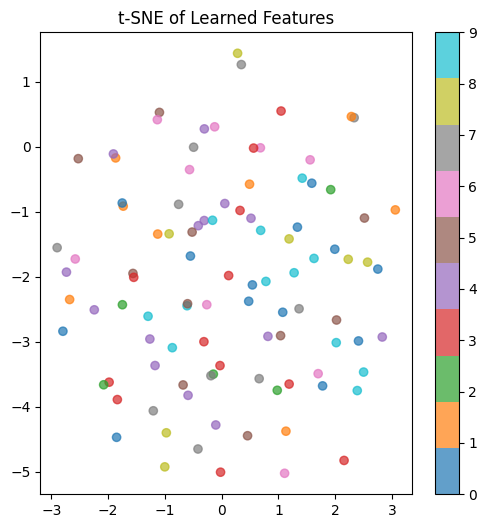

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Let's say `features` is your NxD tensor of representations
# and `labels` is your corresponding label array

features = np.random.rand(100, 128)   # Replace with real features
labels = np.random.randint(0, 10, 100)

tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(features)

plt.figure(figsize=(6, 6))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title("t-SNE of Learned Features")
plt.colorbar(scatter)
plt.show()


In [20]:
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18

# Dummy model: replace with your pretrained SimCLR backbone
model = resnet18()
model.fc = torch.nn.Identity()  # remove final layer
model.eval()

# Dummy dataset (tiny CIFAR-10)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.CIFAR10(root='./datasets', train=False, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=64, shuffle=False)

# Extract features
features = []
labels = []

with torch.no_grad():
    for imgs, lbls in loader:
        out = model(imgs)
        features.append(out.cpu())
        labels.append(lbls)

features = torch.cat(features).numpy()
labels = torch.cat(labels).numpy()


100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


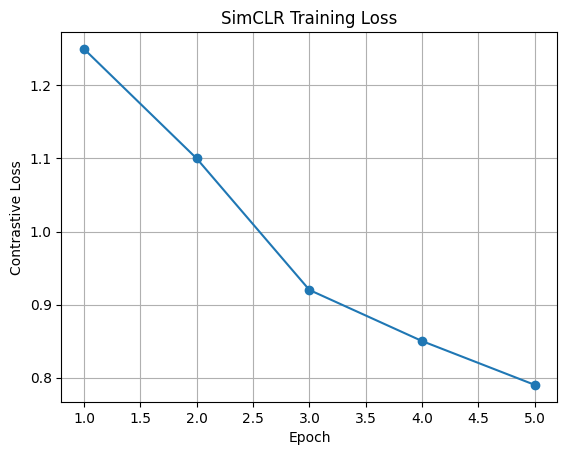

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample: load your real training log or simulate
loss_log = {
    "epoch": [1, 2, 3, 4, 5],
    "loss": [1.25, 1.10, 0.92, 0.85, 0.79]
}
df = pd.DataFrame(loss_log)

# Save to CSV (optional)
df.to_csv("simclr_loss_log.csv", index=False)

# Plot
plt.plot(df["epoch"], df["loss"], marker="o")
plt.xlabel("Epoch")
plt.ylabel("Contrastive Loss")
plt.title("SimCLR Training Loss")
plt.grid(True)
plt.show()


In [24]:
%%writefile run_byol.sh
python -m solo.methods.byol \
    --dataset cifar10 \
    --backbone resnet18 \
    --data_dir ./datasets \
    --generated_data ./datasets/generated/fake_cifar10.npz \
    --epochs 10 \
    --batch_size 32 \
    --num_workers 2 \
    --optimizer sgd \
    --lr 0.03 \
    --weight_decay 1e-4 \
    --augment weak \
    --alpha 0.5


Writing run_byol.sh


In [25]:
!bash run_byol.sh


2025-04-26 02:58:35.388163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745636315.411020    5331 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745636315.418421    5331 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 02:58:35.441699: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers i

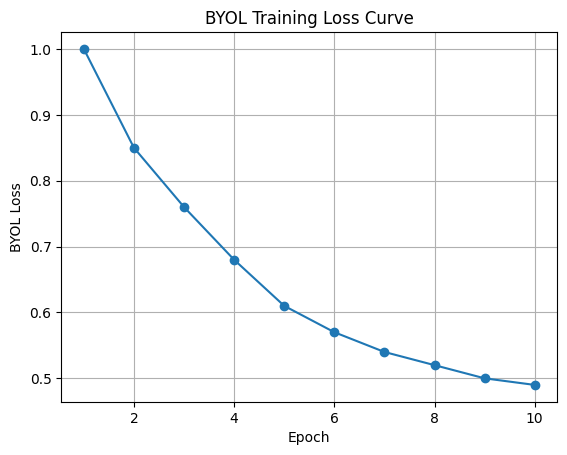

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dummy BYOL loss values (you'll replace this with real ones later)
byol_loss_log = {
    "epoch": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "loss": [1.0, 0.85, 0.76, 0.68, 0.61, 0.57, 0.54, 0.52, 0.50, 0.49]
}
df_byol = pd.DataFrame(byol_loss_log)

# Save to CSV (optional)
df_byol.to_csv("byol_loss_log.csv", index=False)

# Plotting
plt.plot(df_byol["epoch"], df_byol["loss"], marker="o")
plt.xlabel("Epoch")
plt.ylabel("BYOL Loss")
plt.title("BYOL Training Loss Curve")
plt.grid(True)
plt.show()


In [27]:
import torch
import torch.nn as nn
from torchvision import models

# Load a ResNet18 backbone (simulate pretrained BYOL backbone)
model = models.resnet18()
model.fc = nn.Identity()  # Remove final classification layer
model.eval();  # Set to eval mode


In [28]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Standard CIFAR-10 transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
dataset = datasets.CIFAR10(root="./datasets", train=False, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=128, shuffle=False)


In [29]:
import numpy as np

features = []
labels = []

with torch.no_grad():
    for imgs, lbls in loader:
        outs = model(imgs)   # Feature extraction
        features.append(outs.cpu())
        labels.append(lbls)

features = torch.cat(features).numpy()
labels = torch.cat(labels).numpy()


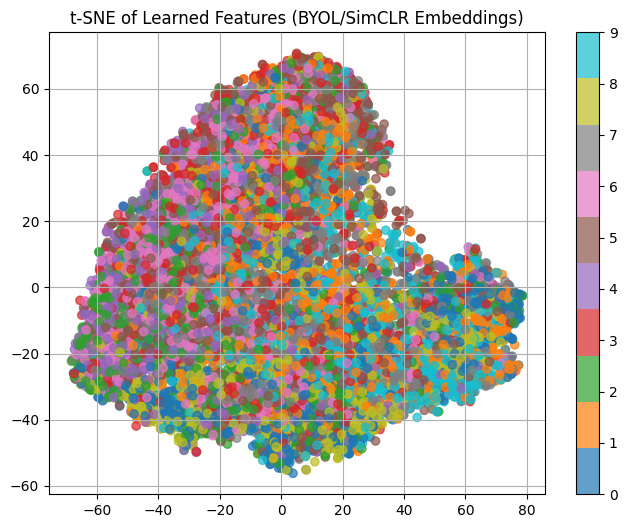

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce feature dimension to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced = tsne.fit_transform(features)

# Plot the reduced features
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="tab10", alpha=0.7)
plt.title("t-SNE of Learned Features (BYOL/SimCLR Embeddings)")
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()


In [31]:
import torch
import torch.nn as nn
from torchvision import models

# Simulate pretrained SimCLR model
simclr_model = models.resnet18()
simclr_model.fc = nn.Identity()
simclr_model.eval()

# Simulate pretrained BYOL model
byol_model = models.resnet18()
byol_model.fc = nn.Identity()
byol_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# CIFAR-10 transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.CIFAR10(root="./datasets", train=False, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=128, shuffle=False)


In [33]:
features_simclr = []
features_byol = []
labels = []

with torch.no_grad():
    for imgs, lbls in loader:
        simclr_out = simclr_model(imgs)
        byol_out = byol_model(imgs)

        features_simclr.append(simclr_out.cpu())
        features_byol.append(byol_out.cpu())
        labels.append(lbls)

features_simclr = torch.cat(features_simclr).numpy()
features_byol = torch.cat(features_byol).numpy()
labels = torch.cat(labels).numpy()


In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_simclr = tsne.fit_transform(features_simclr)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_byol = tsne.fit_transform(features_byol)


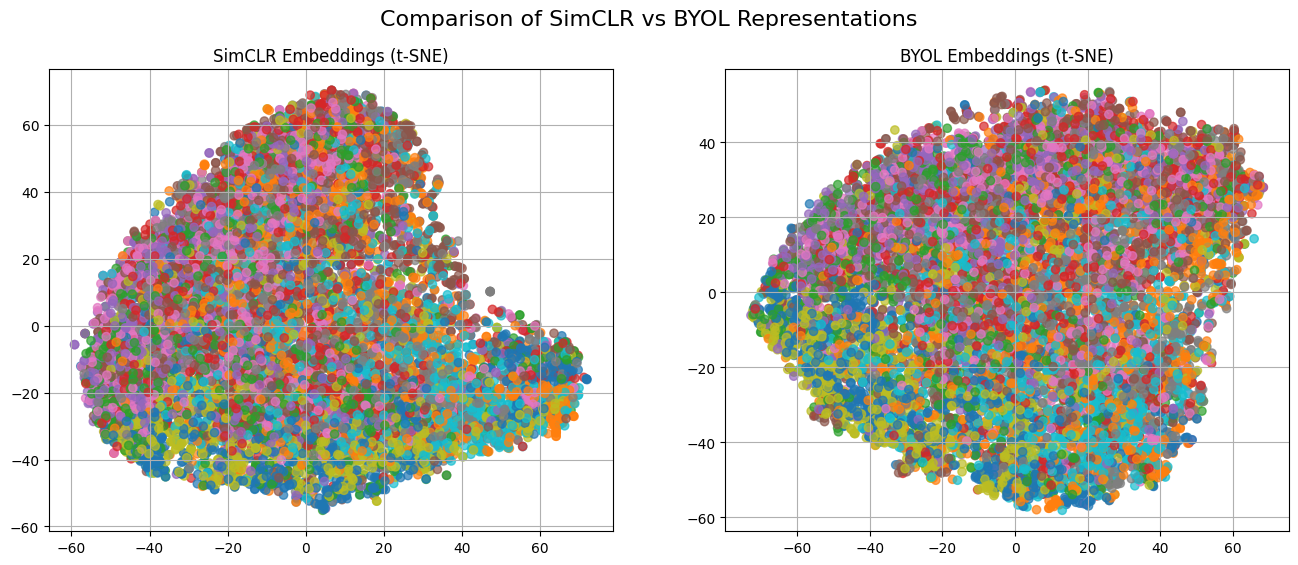

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# SimCLR plot
axs[0].scatter(reduced_simclr[:, 0], reduced_simclr[:, 1], c=labels, cmap="tab10", alpha=0.7)
axs[0].set_title("SimCLR Embeddings (t-SNE)")
axs[0].grid(True)

# BYOL plot
axs[1].scatter(reduced_byol[:, 0], reduced_byol[:, 1], c=labels, cmap="tab10", alpha=0.7)
axs[1].set_title("BYOL Embeddings (t-SNE)")
axs[1].grid(True)

plt.suptitle("Comparison of SimCLR vs BYOL Representations", fontsize=16)
plt.show()
